<a href="https://colab.research.google.com/github/ChrisMath26/AAyCD/blob/main/Regresi%C3%B3n/SVR_vs_RLM_1_Cuaderno_N%C2%B03_AAyCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[Aprendizaje Automático y Ciencia De Datos]**
**Cuaderno N°3 Proyecto AAyCD.**

**Autor:** Christian Camilo Trillera Mota\
**Estudiante:** Maestría en Ciencias - Estadística

##**Aplicación de técnicas de aprendizaje supervisado**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

##Cargar el conjunto de datos generado a partir del análisis EDM

In [ ]:
df = pd.read_csv('data_sup.csv', encoding='UTF-8-SIG')
df

,DEPARTAMENTO,MUNICIPIO,AREA_NACIMIENTO,LOCALIDAD_NACIMIENTO,SIT_PARTO,NOM_INST,SEXO,PESO_GRAMOS,PESO,TALLA_CENTIMETROS,...,NUM_HIJOS_NACIDOS_VIVOS_categoria,NUM_EMBARAZOS_categoria,EDAD_PADRE_categoria,APGAR1_GRUPO,SEXO_GRUPO,PESO_GRUPO,TIPO_PARTO_GRUPO,EDAD_REPRODUCTIVA_GRUPO,NIVEL_EDUCATIVO_GRUPO,ESTADO_CONYUGAL_GRUPO
0,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Usaquén,1.INSTITUCION DE SALUD,FUNDACION SANTA FE DE BOGOTA,1.MASCULINO,2555,4.DEFICIT(2500_2999),48,...,T,T,T,APGAR Bajo,Masculino,Déficit,No Espontáneo,Edad reproductiva típica,Alto nivel educativo,Casada
1,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Teusaquillo,1.INSTITUCION DE SALUD,CLINICA PALERMO -CONG HNAS DOMINICAS,1.MASCULINO,2915,4.DEFICIT(2500_2999),51,...,T,AS,T,APGAR Normal,Masculino,Déficit,Espontáneo,Edad reproductiva atípica,Alto nivel educativo,unión libre
2,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Usaquén,1.INSTITUCION DE SALUD,CENTRO DE ATENCION EN SALUD CAFAM CLINICA SANT...,1.MASCULINO,2615,4.DEFICIT(2500_2999),47,...,T,T,T,APGAR Bajo,Masculino,Déficit,No Espontáneo,Edad reproductiva típica,Alto nivel educativo,unión libre
3,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Ciudad Bolívar,1.INSTITUCION DE SALUD,UNIDAD DE SERVICIOS DE SALUD MEISEN,1.MASCULINO,2525,4.DEFICIT(2500_2999),49,...,T,T,T,APGAR Normal,Masculino,Déficit,Espontáneo,Edad reproductiva típica,Bajo nivel educativo,Soltera
4,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),San Cristóbal,1.INSTITUCION DE SALUD,HOSPITAL UNIVERSITARIO CLINICA SAN RAFAEL,2.FEMENINO,2000,3.BAJO(1500_2499),44,...,AS,AS,T,APGAR Bajo,Femenino,Peso bajo,No Espontáneo,Edad reproductiva típica,Alto nivel educativo,Soltera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60203,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Teusaquillo,1.INSTITUCION DE SALUD,CLINICA MAGDALENA,1.MASCULINO,3075,5.NORMAL(3000_4199),53,...,T,T,T,APGAR Bajo,Masculino,Peso Normal,Espontáneo,Edad reproductiva típica,Alto nivel educativo,Casada
60204,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Los Mártires,1.INSTITUCION DE SALUD,HOSPITAL UNIVERSITARIO MAYOR-MEDERI,2.FEMENINO,2940,4.DEFICIT(2500_2999),49,...,T,T,T,APGAR Normal,Femenino,Déficit,No Espontáneo,Edad reproductiva típica,Alto nivel educativo,Soltera
60205,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Suba,1.INSTITUCION DE SALUD,UNIDAD DE SERVICIOS DE SALUD CENTRO DE SERVICI...,2.FEMENINO,3150,5.NORMAL(3000_4199),48,...,T,T,T,APGAR Normal,Femenino,Peso Normal,No Espontáneo,Edad reproductiva típica,Nivel educativo medio,Soltera
60206,BOGOTA D.C.,BOGOTA D.C.,1.CABECERA MUNICIPAL (CASCO URBANO),Usaquén,1.INSTITUCION DE SALUD,CENTRO DE ATENCION EN SALUD CAFAM CLINICA SANT...,2.FEMENINO,2980,4.DEFICIT(2500_2999),49,...,T,T,T,APGAR Bajo,Femenino,Déficit,No Espontáneo,Edad reproductiva típica,Alto nivel educativo,unión libre


In [ ]:
# Filtrar filas donde GESTACION no sea "Sin Informacion"
df = df[df['GESTACION'] != "Sin Informacion"].copy()
# Reasignar valores a la nueva columna 'GESTACION_GRUPO'
df['GESTACION_GRUPO'] = df['GESTACION'].replace({
    "1.Pretermino(<37)": "pretermino",
    "2.A termino(37 - 42)": "A término"
})


In [ ]:
#columnas_object = df.select_dtypes(include=['object']).columns
#df[columnas_object] = df[columnas_object].astype('category')
#df["Closters"] = df["Closters"].astype("category")

In [ ]:
# Seleccionar solo las variables numéricas para PCA
variables_numericas = [
    "TALLA_CENTIMETROS", "TIEMPO_GESTACION",
    "NUM_CONSULTAS_PRENAT", "EDAD_MADRE",
    "NUM_HIJOS_NACIDOS_VIVOS", "NUM_EMBARAZOS", "EDAD_PADRE"
]

###Variable respuesta (Modelo de regresión lineal múltiple)

In [ ]:
df_numerico = df[variables_numericas].dropna()
y = df["PESO_GRAMOS"]

In [ ]:
#ACP normado
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerico)
pca = PCA(n_components=4)
componentes = pca.fit_transform(df_scaled)
# Convertir componentes principales en DataFrame
df_pca = pd.DataFrame(componentes, columns=[f"PC{i+1}" for i in range(pca.n_components_)])

In [ ]:
df_pca

,PC1,PC2,PC3,PC4
0,-0.853062,0.249994,1.628179,1.173415
1,2.816946,0.686927,-1.168927,-0.637138
2,0.790431,-1.559539,0.374648,-0.199787
3,-2.587053,-0.673528,-0.586203,1.101881
4,2.679142,-1.528650,0.235469,3.755114
...,...,...,...,...
60195,-0.971659,1.576058,-0.196058,-1.073750
60196,-0.583573,0.230599,1.035572,-0.197145
60197,-1.385881,-0.209757,-1.219675,1.762493
60198,1.009655,0.293740,0.761103,0.186611


###Variables categoricas a considerar para el estudio

In [ ]:
variables_categoricas = ["SEXO_GRUPO", "APGAR1_GRUPO", "EDAD_REPRODUCTIVA_GRUPO",'TIPO_PARTO_GRUPO','GESTACION_GRUPO']

In [ ]:
df_categorico = df[variables_categoricas].dropna()

In [ ]:
encoder = OneHotEncoder(drop="first", sparse_output=False)
categorical_encoded = encoder.fit_transform(df_categorico)

In [ ]:
columnas_categoricas = encoder.get_feature_names_out(variables_categoricas)
df_categorico_encoded = pd.DataFrame(categorical_encoded, columns=columnas_categoricas)

In [ ]:
df_final = pd.concat([df_pca, df_categorico_encoded], axis=1)

In [ ]:
df_final["PESO_GRAMOS"] = y.values

In [ ]:
df_final

,PC1,PC2,PC3,PC4,SEXO_GRUPO_Masculino,APGAR1_GRUPO_APGAR Normal,EDAD_REPRODUCTIVA_GRUPO_Edad reproductiva típica,TIPO_PARTO_GRUPO_No Espontáneo,GESTACION_GRUPO_pretermino,PESO_GRAMOS
0,-0.853062,0.249994,1.628179,1.173415,1.0,0.0,1.0,1.0,0.0,2555
1,2.816946,0.686927,-1.168927,-0.637138,1.0,1.0,0.0,0.0,0.0,2915
2,0.790431,-1.559539,0.374648,-0.199787,1.0,0.0,1.0,1.0,1.0,2615
3,-2.587053,-0.673528,-0.586203,1.101881,1.0,1.0,1.0,0.0,0.0,2525
4,2.679142,-1.528650,0.235469,3.755114,0.0,0.0,1.0,1.0,1.0,2000
...,...,...,...,...,...,...,...,...,...,...
60195,-0.971659,1.576058,-0.196058,-1.073750,1.0,0.0,1.0,0.0,0.0,3075
60196,-0.583573,0.230599,1.035572,-0.197145,0.0,1.0,1.0,1.0,0.0,2940
60197,-1.385881,-0.209757,-1.219675,1.762493,0.0,1.0,1.0,1.0,0.0,3150
60198,1.009655,0.293740,0.761103,0.186611,0.0,0.0,1.0,1.0,0.0,2980


###**Variable dependiente e independientes**

In [ ]:
X = df_final.drop(columns=["PESO_GRAMOS"])
y = df_final["PESO_GRAMOS"]

## ---------------------muestra---------------------




In [ ]:
tamaños_muestra = [0.10, 0.25]
resultados = []
for tamaño in tamaños_muestra:
    print(f"\n🔹 Probando con {int(tamaño * 100)}% de los datos 🔹")

    # Dividir el conjunto en una muestra pequeña
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=tamaño, random_state=42)

    # para evaluar el modelo Dividir en entrenamiento y prueba ¿ o con validación cruzada? .................
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    # ---------------------Ajuste de Modelos ---------------------

    # Regresión Lineal
    modelo_lr = LinearRegression()
    modelo_lr.fit(X_train, y_train)
    y_pred_lr = modelo_lr.predict(X_test)

    #  SVR con exploración de hiperparámetros en la muestra pequeña
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.01, 0.1, 1],
        'kernel': ['linear', 'rbf']
    }
#param_grid = {
    #'C': [0.01, 0.1, 1, 10, 100],
    #'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    #'kernel': ['linear', 'rbf', 'poly']
#}

    grid_search = GridSearchCV(SVR(), param_grid, cv=3, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    mejor_svr = grid_search.best_estimator_
    y_pred_svr = mejor_svr.predict(X_test)

    # ---------------------Evaluación ---------------------
    def evaluar_modelo(y_real, y_pred, nombre, tamaño):
        mse = mean_squared_error(y_real, y_pred)
        mae = mean_absolute_error(y_real, y_pred)
        r2 = r2_score(y_real, y_pred)
        print(f"\n🔹 {nombre} con {int(tamaño * 100)}% de datos 🔹")
        print(f"MSE: {mse:.2f}")
        print(f"MAE: {mae:.2f}")
        print(f"R²: {r2:.4f}")
        return mse, mae, r2

    mse_lr, mae_lr, r2_lr = evaluar_modelo(y_test, y_pred_lr, "Regresión Lineal", tamaño)
    mse_svr, mae_svr, r2_svr = evaluar_modelo(y_test, y_pred_svr, "SVR", tamaño)

    # Guardar resultados
    resultados.append({
        "Tamaño": tamaño,
        "Modelo": "Regresión Lineal",
        "MSE": mse_lr,
        "MAE": mae_lr,
        "R²": r2_lr
    })

    resultados.append({
        "Tamaño": tamaño,
        "Modelo": "SVR",
        "MSE": mse_svr,
        "MAE": mae_svr,
        "R²": r2_svr
    })



🔹 Probando con 10% de los datos 🔹

🔹 Regresión Lineal con 10% de datos 🔹
MSE: 72566.62
MAE: 210.23
R²: 0.6853

🔹 SVR con 10% de datos 🔹
MSE: 73115.45
MAE: 210.28
R²: 0.6830

🔹 Probando con 25% de los datos 🔹

🔹 Regresión Lineal con 25% de datos 🔹
MSE: 72082.54
MAE: 212.39
R²: 0.7063

🔹 SVR con 25% de datos 🔹
MSE: 72216.75
MAE: 211.82
R²: 0.7057


In [ ]:
# Convertir resultados en DataFrame
df_resultados = pd.DataFrame(resultados)
df_resultados

,Tamaño,Modelo,MSE,MAE,R²
0,0.10,Regresión Lineal,72566.622412,210.233489,0.685347
1,0.10,SVR,73115.451647,210.283866,0.682967
2,0.25,Regresión Lineal,72082.538287,212.388953,0.706284
3,0.25,SVR,72216.745212,211.816662,0.705737


In [ ]:
print("🔹 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

🔹 Mejores hiperparámetros encontrados:
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
resultados_cv = pd.DataFrame(grid_search.cv_results_)
resultados_cv = resultados_cv[["param_C", "param_gamma", "param_kernel", "mean_test_score", "std_test_score"]]
print(resultados_cv.sort_values(by="mean_test_score", ascending=False))


    param_C param_gamma param_kernel  mean_test_score  std_test_score
16      1.0         0.1       linear         0.689368        0.013328
14      1.0        0.01       linear         0.689368        0.013328
12      1.0        auto       linear         0.689368        0.013328
18      1.0           1       linear         0.689368        0.013328
10      1.0       scale       linear         0.689368        0.013328
22     10.0        auto       linear         0.689268        0.014594
28     10.0           1       linear         0.689268        0.014594
24     10.0        0.01       linear         0.689268        0.014594
20     10.0       scale       linear         0.689268        0.014594
26     10.0         0.1       linear         0.689268        0.014594
25     10.0        0.01          rbf         0.681147        0.008961
0       0.1       scale       linear         0.661426        0.006019
8       0.1           1       linear         0.661426        0.006019
6       0.1         

###{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}



🔹 Entrenando el modelo final con el 100% de los datos 🔹

🔹 **Desempeño del Modelo Final SVR ** 🔹
MSE: 75634.36
MAE: 215.47
R²: 0.6913


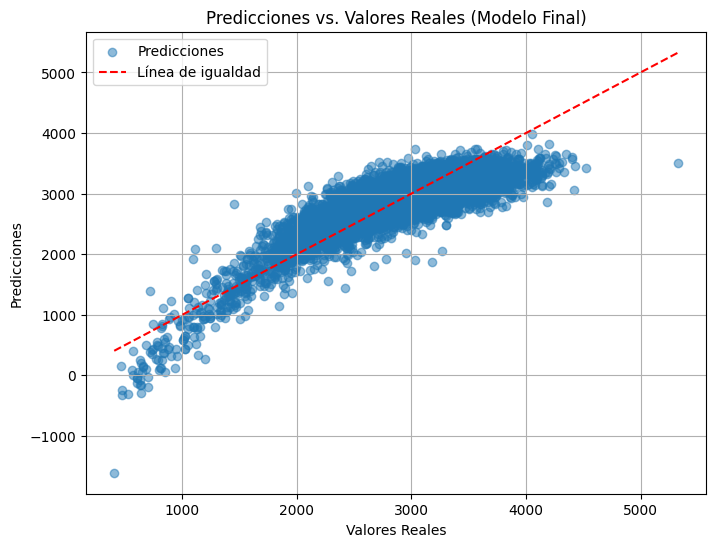

In [ ]:
# --------------------- Entrenamiento del Modelo Final con 100% de los datos ---------------------

print("\n🔹 Entrenando el modelo final con el 100% de los datos 🔹")

# Volver a dividir los datos completos en entrenamiento y prueba
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo SVR con los mejores hiperparámetros encontrados
modelo_final_svr = SVR(C=1, gamma='scale', kernel='linear')

# Entrenar el modelo con todos los datos disponibles
modelo_final_svr.fit(X_train_full, y_train_full)

# Hacer predicciones en el conjunto de prueba
y_pred_final = modelo_final_svr.predict(X_test_full)

# Evaluar el desempeño del modelo final
mse_final = mean_squared_error(y_test_full, y_pred_final)
mae_final = mean_absolute_error(y_test_full, y_pred_final)
r2_final = r2_score(y_test_full, y_pred_final)

# Mostrar resultados finales
print(f"\n🔹 **Desempeño del Modelo Final SVR ** 🔹")
print(f"MSE: {mse_final:.2f}")
print(f"MAE: {mae_final:.2f}")
print(f"R²: {r2_final:.4f}")

# --------------------- Gráfico de Predicciones vs. Valores Reales ---------------------

plt.figure(figsize=(8, 6))
plt.scatter(y_test_full, y_pred_final, alpha=0.5, label="Predicciones")
plt.plot([min(y_test_full), max(y_test_full)], [min(y_test_full), max(y_test_full)], color='red', linestyle='--', label="Línea de igualdad")
plt.title("Predicciones vs. Valores Reales (Modelo Final)")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.legend()
plt.grid(True)
plt.show()



🔹 Entrenando el modelo de Regresión Lineal con el 100% de los datos 🔹

🔹 **Desempeño del Modelo Final de Regresión Lineal** 🔹
MSE: 75411.04
MAE: 215.70
R²: 0.6922

🔹 **Comparación de Modelos** 🔹
             Modelo           MSE         MAE        R²
0               SVR  75634.359910  215.471673  0.691276
1  Regresión Lineal  75411.042176  215.703964  0.692187


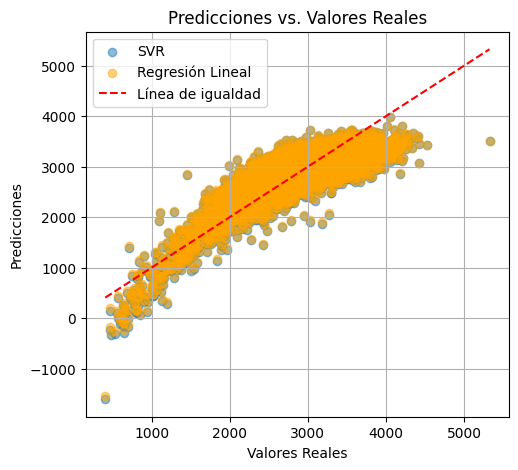

In [ ]:
# --------------------- Entrenamiento del Modelo Final de Regresión Lineal ---------------------

print("\n🔹 Entrenando el modelo de Regresión Lineal con el 100% de los datos 🔹")

# Crear y entrenar el modelo de Regresión Lineal
modelo_final_lr = LinearRegression()
modelo_final_lr.fit(X_train_full, y_train_full)

# Hacer predicciones en el conjunto de prueba
y_pred_lr_final = modelo_final_lr.predict(X_test_full)

# Evaluar el desempeño de Regresión Lineal
mse_lr_final = mean_squared_error(y_test_full, y_pred_lr_final)
mae_lr_final = mean_absolute_error(y_test_full, y_pred_lr_final)
r2_lr_final = r2_score(y_test_full, y_pred_lr_final)

# Mostrar resultados finales de Regresión Lineal
print(f"\n🔹 **Desempeño del Modelo Final de Regresión Lineal** 🔹")
print(f"MSE: {mse_lr_final:.2f}")
print(f"MAE: {mae_lr_final:.2f}")
print(f"R²: {r2_lr_final:.4f}")

# ---------------------Comparación de Modelos Finales ---------------------

# Crear DataFrame con los resultados de ambos modelos
df_comparacion = pd.DataFrame({
    "Modelo": ["SVR", "Regresión Lineal"],
    "MSE": [mse_final, mse_lr_final],
    "MAE": [mae_final, mae_lr_final],
    "R²": [r2_final, r2_lr_final]
})

print("\n🔹 **Comparación de Modelos** 🔹")
print(df_comparacion)

# --------------------- Gráficos de Comparación ---------------------

plt.figure(figsize=(12, 5))

#  Comparación de Predicciones vs. Valores Reales para ambos modelos
plt.subplot(1, 2, 1)
plt.scatter(y_test_full, y_pred_final, alpha=0.5, label="SVR")
plt.scatter(y_test_full, y_pred_lr_final, alpha=0.5, label="Regresión Lineal", color="orange")
plt.plot([min(y_test_full), max(y_test_full)], [min(y_test_full), max(y_test_full)], color='red', linestyle='--', label="Línea de igualdad")
plt.title("Predicciones vs. Valores Reales")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.legend()
plt.grid(True)

###{C=10, gamma=0.01, kernel='rbf'}

In [ ]:
# --------------------- Entrenamiento del Modelo Final con 100% de los datos ---------------------

print("\n🔹 Entrenando el modelo final con el 100% de los datos 🔹")

# Volver a dividir los datos completos en entrenamiento y prueba
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo SVR con los mejores hiperparámetros encontrados
modelo_final_svr = SVR(C=10, gamma=0.01, kernel='rbf')

# Entrenar el modelo con todos los datos disponibles
modelo_final_svr.fit(X_train_full, y_train_full)

# Hacer predicciones en el conjunto de prueba
y_pred_final = modelo_final_svr.predict(X_test_full)

# Evaluar el desempeño del modelo final
mse_final = mean_squared_error(y_test_full, y_pred_final)
mae_final = mean_absolute_error(y_test_full, y_pred_final)
r2_final = r2_score(y_test_full, y_pred_final)

# Mostrar resultados finales
print(f"\n🔹 **Desempeño del Modelo Final SVR ** 🔹")
print(f"MSE: {mse_final:.2f}")
print(f"MAE: {mae_final:.2f}")
print(f"R²: {r2_final:.4f}")



🔹 Entrenando el modelo final con el 100% de los datos 🔹

🔹 **Desempeño del Modelo Final SVR ** 🔹
MSE: 72932.03
MAE: 211.59
R²: 0.7023


In [ ]:
# ---------------------Entrenamiento del Modelo Final de Regresión Lineal ---------------------

print("\n🔹 Entrenando el modelo de Regresión Lineal con el 100% de los datos 🔹")

# Crear y entrenar el modelo de Regresión Lineal
modelo_final_lr = LinearRegression()
modelo_final_lr.fit(X_train_full, y_train_full)

# Hacer predicciones en el conjunto de prueba
y_pred_lr_final = modelo_final_lr.predict(X_test_full)

# Evaluar el desempeño de Regresión Lineal
mse_lr_final = mean_squared_error(y_test_full, y_pred_lr_final)
mae_lr_final = mean_absolute_error(y_test_full, y_pred_lr_final)
r2_lr_final = r2_score(y_test_full, y_pred_lr_final)

# Mostrar resultados finales de Regresión Lineal
print(f"\n🔹 **Desempeño del Modelo Final de Regresión Lineal** 🔹")
print(f"MSE: {mse_lr_final:.2f}")
print(f"MAE: {mae_lr_final:.2f}")
print(f"R²: {r2_lr_final:.4f}")

# ---------------------Comparación de Modelos Finales ---------------------

# Crear DataFrame con los resultados de ambos modelos
df_comparacion = pd.DataFrame({
    "Modelo": ["SVR", "Regresión Lineal"],
    "MSE": [mse_final, mse_lr_final],
    "MAE": [mae_final, mae_lr_final],
    "R²": [r2_final, r2_lr_final]
})

print("\n🔹 **Comparación de Modelos** 🔹")
print(df_comparacion)


🔹 Entrenando el modelo de Regresión Lineal con el 100% de los datos 🔹

🔹 **Desempeño del Modelo Final de Regresión Lineal** 🔹
MSE: 75411.04
MAE: 215.70
R²: 0.6922

🔹 **Comparación de Modelos** 🔹
             Modelo           MSE         MAE        R²
0               SVR  72932.028404  211.594334  0.702306
1  Regresión Lineal  75411.042176  215.703964  0.692187


###{C=100, gamma='auto', kernel='poly'}

In [ ]:
print("\n🔹 Entrenando el modelo final con el 100% de los datos 🔹")

# Volver a dividir los datos completos en entrenamiento y prueba
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo SVR con los mejores hiperparámetros encontrados
modelo_final_svr = SVR(C=100, gamma='auto', kernel='poly')

# Entrenar el modelo con todos los datos disponibles
modelo_final_svr.fit(X_train_full, y_train_full)

# Hacer predicciones en el conjunto de prueba
y_pred_final = modelo_final_svr.predict(X_test_full)

# Evaluar el desempeño del modelo final
mse_final = mean_squared_error(y_test_full, y_pred_final)
mae_final = mean_absolute_error(y_test_full, y_pred_final)
r2_final = r2_score(y_test_full, y_pred_final)

# Mostrar resultados finales
print(f"\n🔹 **Desempeño del Modelo Final SVR ** 🔹")
print(f"MSE: {mse_final:.2f}")
print(f"MAE: {mae_final:.2f}")
print(f"R²: {r2_final:.4f}")


🔹 Entrenando el modelo final con el 100% de los datos 🔹

🔹 **Desempeño del Modelo Final SVR ** 🔹
MSE: 74332.39
MAE: 213.99
R²: 0.6966


In [ ]:
# --------------------- Entrenamiento del Modelo Final de Regresión Lineal ---------------------

print("\n🔹 Entrenando el modelo de Regresión Lineal con el 100% de los datos 🔹")

# Crear y entrenar el modelo de Regresión Lineal
modelo_final_lr = LinearRegression()
modelo_final_lr.fit(X_train_full, y_train_full)

# Hacer predicciones en el conjunto de prueba
y_pred_lr_final = modelo_final_lr.predict(X_test_full)

# Evaluar el desempeño de Regresión Lineal
mse_lr_final = mean_squared_error(y_test_full, y_pred_lr_final)
mae_lr_final = mean_absolute_error(y_test_full, y_pred_lr_final)
r2_lr_final = r2_score(y_test_full, y_pred_lr_final)

# Mostrar resultados finales de Regresión Lineal
print(f"\n🔹 **Desempeño del Modelo Final de Regresión Lineal** 🔹")
print(f"MSE: {mse_lr_final:.2f}")
print(f"MAE: {mae_lr_final:.2f}")
print(f"R²: {r2_lr_final:.4f}")

# --------------------- Comparación de Modelos Finales ---------------------

# Crear DataFrame con los resultados de ambos modelos
df_comparacion = pd.DataFrame({
    "Modelo": ["SVR", "Regresión Lineal"],
    "MSE": [mse_final, mse_lr_final],
    "MAE": [mae_final, mae_lr_final],
    "R²": [r2_final, r2_lr_final]
})

print("\n🔹 **Comparación de Modelos** 🔹")
print(df_comparacion)


🔹 Entrenando el modelo de Regresión Lineal con el 100% de los datos 🔹

🔹 **Desempeño del Modelo Final de Regresión Lineal** 🔹
MSE: 75411.04
MAE: 215.70
R²: 0.6922

🔹 **Comparación de Modelos** 🔹
             Modelo           MSE         MAE        R²
0               SVR  74332.394137  213.989252  0.696590
1  Regresión Lineal  75411.042176  215.703964  0.692187


#### **Tendencias Observadas**  
📌 **Regresión Lineal funciona bien con pocos datos**, pero no mejora significativamente al aumentar la cantidad de datos.  
📌 **SVR necesita más datos para superar a la regresión lineal**, y su desempeño mejora n con conjuntos de datos más grandes aunque depende del ajuste de hiperparametros.  
📌 **El MSE de SVR disminuye a medida que aumentamos los datos**, lo que indica que generaliza mejor con más información.  

### 🔹 **Análisis de la Comparación entre SVR y Regresión Lineal**  



 **Conclusión principal:**  
   - **SVR es el mejor modelo en este caso**, ya que tiene **mayor capacidad predictiva** y **menores errores**.  
   - **La regresión lineal sigue siendo un buen modelo**, pero el SVR captura mejor la estructura no lineal de los datos.  
   - Si el costo computacional **no es un problema**, **se recomienda usar SVR** para la predicción final.  

**Decisión final:** De los modelos probados, SVR con `C=10, gamma=0.01, kernel='rbf'` es el mejor modelo para predecir el peso del recién nacido.

##Análisis sin datos atípicos.
https://colab.research.google.com/drive/1ztqRDu0qXfvB35jiz9l6mSpx8PM-hddh?usp=sharing

### **Análisis de los resultados sin valores atípicos vs. con valores atípicos**  


## **Conclusiones**
1. **Sin valores atípicos, la regresión lineal supera al SVR**  
   - En este nuevo escenario, **la regresión lineal tiene menor MSE, menor MAE y mayor R²** que SVR.  
   - Esto indica que, al eliminar los valores atípicos, **la relación entre las variables puede modelarse de manera más efectiva con una función lineal**.  

2. **Los valores atípicos afectaban más a la regresión lineal**  
   - Cuando los valores atípicos estaban presentes, **SVR tenía mejor desempeño que la regresión lineal**.  
   - Sin embargo, al eliminarlos, la regresión lineal mejora considerablemente y **ahora supera a SVR**.  
   - Esto sugiere que **la regresión lineal era más sensible a los valores extremos**, lo que elevaba su MSE y MAE.  

  


---


###Análisis con solo dos ejes factoriales

https://colab.research.google.com/drive/1DY6ii-Y1jr439q-ySthvusuItycX1boN?usp=sharing

##Análisis sin considerar los ejes factoriales

https://colab.research.google.com/drive/1DqE_rApNjMHh56-816Dd-qmRPG64pAnK?usp=sharing

SGD regresión:

https://colab.research.google.com/drive/1_ow_pb2E4mjfIFw6kM5uiltvuaUW3PRM?usp=sharing

###  **Análisis de Resultados**  



| **Modelo**                     | **MSE**  | **MAE**  | **R²**  |
|--------------------------------|-----------|-----------|-----------|
| **SVR (con PCA)**              | **72,932.03**  | **211.59**  | **0.7023**  |
| **Regresión Lineal (con PCA)**  | 75,411.04  | 215.70  | 0.6922  |
| **SVR (sin PCA)**               | **71,640.28**  | **209.45**  | **0.7076**  |
| **Regresión Lineal (sin PCA)**   | 73,869.46  | 212.95  | 0.6985  |
| **SGDRegressor (sin PCA)**       | 73,919.37  | 213.19  | 0.6983  |


1. **SVR tiene el mejor desempeño** en todas las métricas, tanto con PCA como sin PCA.  
   - Al eliminar PCA y usar los datos originales, el desempeño mejora ligeramente.  
   - Muestra **menor error cuadrático medio (MSE)** y **mejor R²**, lo que confirma su robustez.  

2. **SGDRegressor y Regresión Lineal tienen desempeños muy similares.**  
   - El **SGDRegressor** con **ElasticNet** (combinación de Lasso y Ridge) logra casi el mismo **MSE y R²** que la regresión lineal tradicional.  
   - Sin embargo, su rendimiento sigue siendo inferior a SVR, lo cual era esperado, dado que SVR puede modelar relaciones más complejas.  

3. **El PCA no ayuda mucho en este caso.**  
   - **Los modelos funcionan mejor sin PCA.**  
   - La reducción de dimensionalidad **puede perder información relevante**, afectando la capacidad predictiva del modelo.  
   - Sin PCA, el desempeño mejora en todos los modelos.  

---



